In [87]:
from folium.map import Icon
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('vancouver_crimes.csv')
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


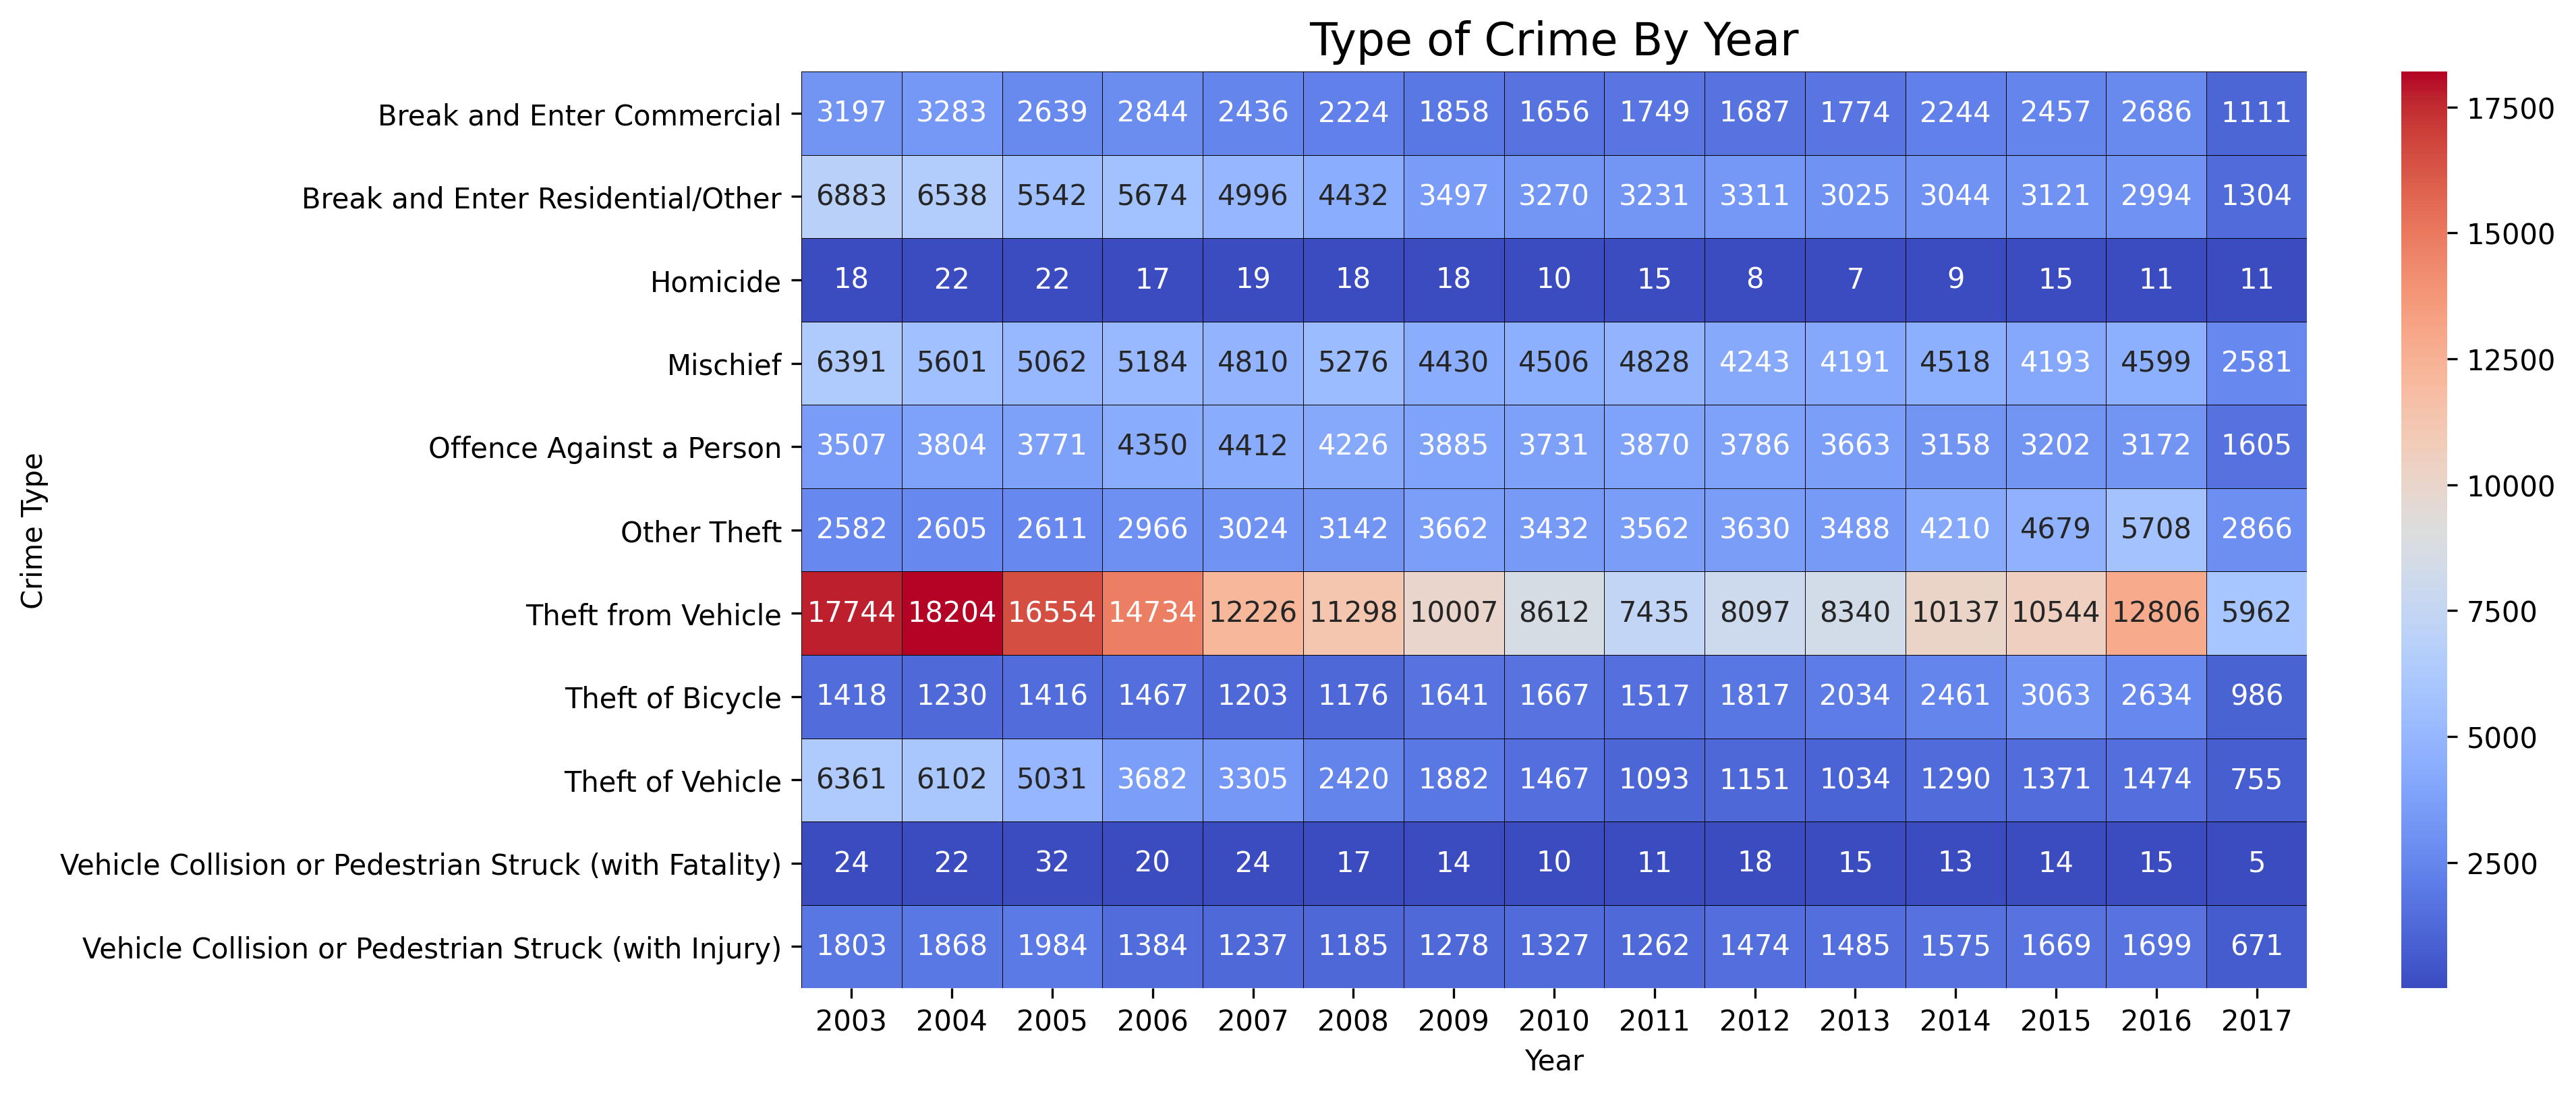

In [89]:
df['Incident'] = 1 #To keep track of incident totals per crime type
dfPivYear = df.pivot_table(values='Incident', index='TYPE', columns='YEAR', aggfunc=len)

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi=300)
plt.title('Type of Crime By Year', fontsize=16)
plt.tick_params(labelsize=10)

sns.heatmap(
    dfPivYear.round(), 
    linecolor='black',
    linewidths=0.2,
    cmap='coolwarm', 
    annot=True, 
    fmt=".0f"
);

ax.set_ylabel('Crime Type')    
ax.set_xlabel('Year')

plt.show()

### We can see that 2010-2013 is the period with the lowest crimes, and that Thefts from Vehicle decreased a lot.

### Now let's find out at when most of bicycle thefts are happening.

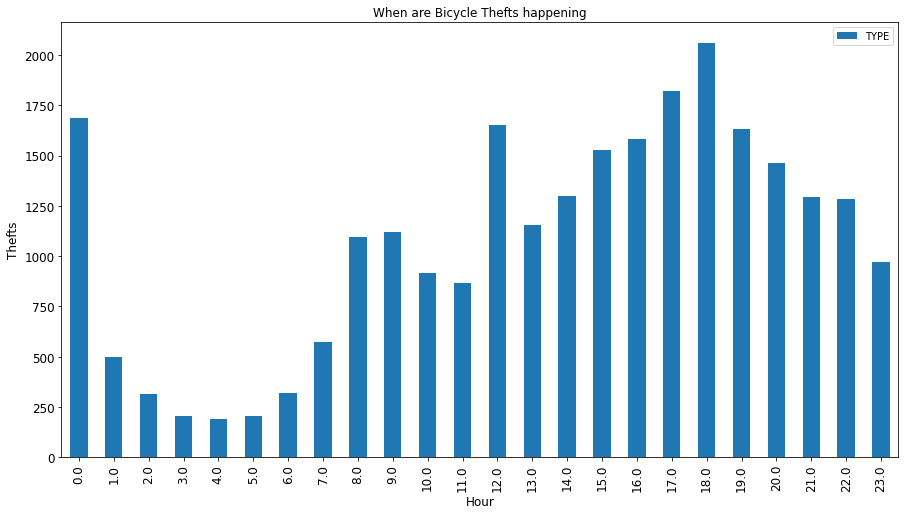

In [90]:
bicycle = df[(df['TYPE'] == 'Theft of Bicycle')]
bicycle_hour = bicycle[['TYPE', 'HOUR']].groupby(['HOUR'], as_index = False).count()

ax = bicycle_hour.plot(kind='bar', x='HOUR', title ="When are Bicycle Thefts happening", figsize=(15, 8), fontsize=12,legend=True,)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Thefts", fontsize=12)
plt.show()

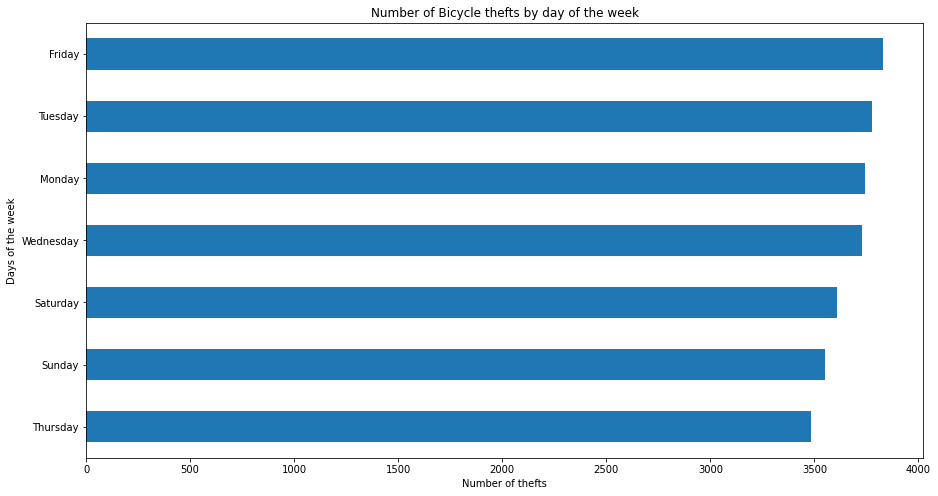

In [91]:
bicycle['Date'] = pd.to_datetime({'year':bicycle['YEAR'], 'month':bicycle['MONTH'], 'day':bicycle['DAY']})
bicycle['DayOfWeek'] = bicycle['Date'].dt.day_name()
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

bicycle.groupby(bicycle["DayOfWeek"]).size().sort_values().plot(kind='barh', figsize=(15, 8))

plt.ylabel('Days of the week')
plt.xlabel('Number of thefts')
plt.title('Number of Bicycle thefts by day of the week')
plt.show()

### We see that bicycle thefts happen all the week and most of them on Friday around 6 pm. Let's create a map to see in which area you shouldn't park your bicycle at 6pm.

In [92]:
bicycle_18 = bicycle[(bicycle['HOUR'] == 18)]

map = folium.Map(location=[49.269302,-123.083763], zoom_start=12)

for i,row in bicycle_18.iterrows():
    lat = bicycle_18.at[i, 'Latitude']
    lng = bicycle_18.at[i, 'Longitude']
    neigh = bicycle_18.at[i, 'NEIGHBOURHOOD']
    folium.Circle(location=[lat,lng] , popup= neigh, color='blue', fill=True, fill_color = 'white').add_to(map)
map


![](https://user-images.githubusercontent.com/79513906/130361621-b93e59e6-c428-47b4-811d-7223e9c755af.PNG)

### It looks like parking your bicycle in the Central Business District is not the best thing to do.
